In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import mrjob as mr

### Homework 5

Copy this notebook. Rename it as: YOURNAME-HW4-mapreduce-XX

with your name replacing YOURNAME and the xx replaced with the date you submit or copy this HW.

Upload your completed jupyter notebook to elearning site as your homework submission. Do not put this notebook on your github.

Do all the homeworks problems below:
As noted doing the homework gets a 3 out of 5. Extension of homework to to implement an TD-IDF algorithm  (see below)

Use the data/bible+shakes.nonpunc.txt file as the source of you analysis in this homework

## Homework 5.1
 A bigram is the combination of words.  Find the 10 most common bigrams from the text.  Order counts in the bigram combination for example "in the" is not the same bigram as "the in"



In [ ]:
# %load code/CountBigrams.py
from mrjob.job import MRJob
from mrjob.step import MRStep

class CountBigrams(MRJob):
    
    """ The steps() method basically is used to define the steps of the Map Reduce job being defined in the class"""
    def steps(self):
        return [
            MRStep(mapper=self.mapper,
                  combiner = self.combiner,
                  reducer=self.reducer),
            MRStep(reducer=self.top10)
        ]
    
    """ The mapper() method takes a key and a value as args - Use of the character _ infers key is ignored
        The method changes the text to lowercase and then splits the text into words, default separator is whitespace.
        Finally the method yields list of key-value pairs. Here the key is the word pair, and the value is 1. """
    def mapper(self, _, line): 
        line = line.lower().split()           
        for words in zip(line, line[1:]):        
            yield list((words[0], words[1])), 1
            
    """ The combiner() method takes two word pairs as key and 1 as the value. 
        The method then yields the sum of 1s for recurring word pairs 
        Thus this method gives us the count of each existing word pair. """
    def combiner(self, bigram, counts):
        yield bigram, sum(counts)                
                               
    """ The reduce() method takes a key and an iterator of vaues.
        The method also yields key-value pairs"""
    def reducer(self, bigram, counts):          
        yield None, (bigram, sum(counts))
                   
    """ The top10() method sorts the word pair list on the basis of frequencey and yields the top 10 word pairs/bigrams"""
    def top10(self, _, bigram_count):
        for i in sorted(bigram_count, key=lambda x:x[1], reverse=True)[:10]:
                   yield i

            
if __name__ == '__main__':
    CountBigrams.run()

In [28]:
%%capture CountBigrams
%run code/CountBigrams.py data/bible+shakes.nopunc.txt

No configs found; falling back on auto-configuration
No configs specified for inline runner
Running step 1 of 2...
Creating temp directory c:\users\sam\appdata\local\temp\CountBigrams.Sam.20181008.155052.564000
Running step 2 of 2...
Streaming final output from c:\users\sam\appdata\local\temp\CountBigrams.Sam.20181008.155052.564000\output...
Removing temp directory c:\users\sam\appdata\local\temp\CountBigrams.Sam.20181008.155052.564000...
[Error 5] Access is denied: u'c:\\users\\sam\\appdata\\local\\temp\\CountBigrams.Sam.20181008.155052.564000\\step\\000\\cache\\CountBigrams.py'
Traceback (most recent call last):
  File "C:\Users\Sam\Anaconda2\lib\site-packages\mrjob\runner.py", line 606, in _cleanup_local_tmp
    shutil.rmtree(self._local_tmp_dir)
  File "C:\Users\Sam\Anaconda2\lib\shutil.py", line 261, in rmtree
    rmtree(fullname, ignore_errors, onerror)
  File "C:\Users\Sam\Anaconda2\lib\shutil.py", line 261, in rmtree
    rmtree(fullname, ignore_errors, onerror)
  File "C:\Users

In [29]:
with open('data/bigrams.txt','w') as f:
    f.write(CountBigrams.stdout)

In [30]:
orderedbigrams = pd.read_csv('data/bigrams.txt', sep='\t', header = None)
orderedbigrams

,0,1
0,"[""of"",""the""]",13037
1,"[""and"",""the""]",7034
2,"[""the"",""lord""]",7017
3,"[""in"",""the""]",6738
4,"[""to"",""the""]",3799
5,"[""i"",""will""]",3470
6,"[""and"",""he""]",3020
7,"[""shall"",""be""]",3013
8,"[""all"",""the""]",2714
9,"[""i"",""have""]",2666


## Homework 5.2
Now do the same analysis but make the word order not count "in the" == "the in".  Find the 10 most common ordered bigrams from the text.  
 

In [ ]:
# %load code/CountOrderlessBigrams.py
from mrjob.job import MRJob
from mrjob.step import MRStep

class CountOrderlessBigrams(MRJob):
    
    """ The steps() method basically is used to define the steps of the Map Reduce job being defined in the class"""
    def steps(self):
        return [
            MRStep(mapper=self.mapper,
                  combiner = self.combiner,
                  reducer=self.reducer),
            MRStep(reducer=self.top10)
        ]
    
    """ The mapper() method takes a key and a value as args - Use of the character _ infers key is ignored
        The method changes the text to lowercase and then splits the text into words, default separator is whitespace.
        Finally the method yields list of key-value pairs. 
        Here the key is the word pair in SORTED order, and the value is 1. 
        The sorting here is used to disregard the order of the words. For example "in the" and "the in" will be counted together"""
    def mapper(self, _, line): 
        line = line.lower().split()           
        for words in zip(line, line[1:]):        
            yield list(sorted((words[0], words[1]))), 1 
            
    """ The combiner() method takes two word pairs as key and 1 as the value. 
        The method then yields the sum of 1s for recurring word pairs 
        Thus this method gives us the count of each existing word pair. """
    def combiner(self, bigram, counts):
        yield bigram, sum(counts)                
                               
    """ The reduce() method takes a key and an iterator of vaues.
        The method also yields key-value pairs"""
    def reducer(self, bigram, counts):          
        yield None, (bigram, sum(counts))
                   
    """ The top10() method sorts the word pair list on the basis of frequencey and yields the top 10 word pairs/bigrams"""
    def top10(self, _, bigram_count):
        for i in sorted(bigram_count, key=lambda x:x[1], reverse=True)[:10]:
            yield i

            
if __name__ == '__main__':
    CountOrderlessBigrams.run()

In [22]:
%%capture CountOrderlessBigrams
%run code/CountOrderlessBigrams.py data/bible+shakes.nopunc.txt

No configs found; falling back on auto-configuration
No configs specified for inline runner
Running step 1 of 2...
Creating temp directory c:\users\sam\appdata\local\temp\CountOrderlessBigrams.Sam.20181008.154547.201000
Running step 2 of 2...
Streaming final output from c:\users\sam\appdata\local\temp\CountOrderlessBigrams.Sam.20181008.154547.201000\output...
Removing temp directory c:\users\sam\appdata\local\temp\CountOrderlessBigrams.Sam.20181008.154547.201000...
[Error 5] Access is denied: u'c:\\users\\sam\\appdata\\local\\temp\\CountOrderlessBigrams.Sam.20181008.154547.201000\\step\\000\\cache\\CountOrderlessBigrams.py'
Traceback (most recent call last):
  File "C:\Users\Sam\Anaconda2\lib\site-packages\mrjob\runner.py", line 606, in _cleanup_local_tmp
    shutil.rmtree(self._local_tmp_dir)
  File "C:\Users\Sam\Anaconda2\lib\shutil.py", line 261, in rmtree
    rmtree(fullname, ignore_errors, onerror)
  File "C:\Users\Sam\Anaconda2\lib\shutil.py", line 261, in rmtree
    rmtree(fulln

In [23]:
with open('data/orderlessbigrams.txt','w') as f:
    f.write(CountOrderlessBigrams.stdout)

In [36]:
bigrams = pd.read_csv('data/orderlessbigrams.txt', sep='\t', header = None)
bigrams

,0,1
0,"[""of"",""the""]",13037
1,"[""lord"",""the""]",7244
2,"[""and"",""the""]",7034
3,"[""in"",""the""]",6739
4,"[""i"",""will""]",4100
5,"[""the"",""to""]",3799
6,"[""and"",""he""]",3129
7,"[""have"",""i""]",3123
8,"[""be"",""shall""]",3015
9,"[""am"",""i""]",2881


## Homework 5.3
A trigram are three word combintation.  Find the 10 most common ordered trigrams from the text.  Make it so that the order of the words do not count in the trigram combination for example "in the air" is the same trigram as "the air in" or "air in the"...


In [ ]:
# %load code/CountOrderlessTrigrams.py
from mrjob.job import MRJob
from mrjob.step import MRStep

class CountOrderlessTrigrams(MRJob):
    
    def steps(self):
        return [
            MRStep(mapper=self.mapper,
                  combiner = self.combiner,
                  reducer=self.reducer),
            MRStep(reducer=self.top10)
        ]
    
    """ Here the key will be a list of 3 words instead of 2. And the sorted() method is used to disregard the order of these words."""
    def mapper(self, _, line): 
        line = line.lower().split()           
        for words in zip(line, line[1:], line[2:]):
            yield list(sorted((words[0], words[1], words[2]))), 1 
           
    def combiner(self, trigram, counts):
        yield trigram, sum(counts)                
                               
    def reducer(self, trigram, counts):          
        yield None, (trigram, sum(counts))
                   
    def top10(self, _, trigram_count):
        for i in sorted(trigram_count, key=lambda x:x[1], reverse=True)[:10]:
                   yield i

            
if __name__ == '__main__':
    CountOrderlessTrigrams.run()

In [31]:
%%capture CountOrderlessTrigrams
%run code/CountOrderlessTrigrams.py data/bible+shakes.nopunc.txt

No configs found; falling back on auto-configuration
No configs specified for inline runner
Running step 1 of 2...
Creating temp directory c:\users\sam\appdata\local\temp\CountOrderlessTrigrams.Sam.20181008.155205.039000
Running step 2 of 2...
Streaming final output from c:\users\sam\appdata\local\temp\CountOrderlessTrigrams.Sam.20181008.155205.039000\output...
Removing temp directory c:\users\sam\appdata\local\temp\CountOrderlessTrigrams.Sam.20181008.155205.039000...
[Error 5] Access is denied: u'c:\\users\\sam\\appdata\\local\\temp\\CountOrderlessTrigrams.Sam.20181008.155205.039000\\step\\000\\cache\\CountOrderlessTrigrams.py'
Traceback (most recent call last):
  File "C:\Users\Sam\Anaconda2\lib\site-packages\mrjob\runner.py", line 606, in _cleanup_local_tmp
    shutil.rmtree(self._local_tmp_dir)
  File "C:\Users\Sam\Anaconda2\lib\shutil.py", line 261, in rmtree
    rmtree(fullname, ignore_errors, onerror)
  File "C:\Users\Sam\Anaconda2\lib\shutil.py", line 261, in rmtree
    rmtree(

In [32]:
with open('data/trigrams.txt','w') as f:
    f.write(CountOrderlessTrigrams.stdout)

In [33]:
trigrams = pd.read_csv('data/trigrams.txt', sep='\t', header = None)
trigrams

,0,1
0,"[""lord"",""of"",""the""]",2053
1,"[""children"",""of"",""the""]",1794
2,"[""house"",""of"",""the""]",1581
3,"[""of"",""son"",""the""]",1523
4,"[""and"",""lord"",""the""]",1187
5,"[""land"",""of"",""the""]",1025
6,"[""lord"",""saith"",""the""]",866
7,"[""of"",""out"",""the""]",855
8,"[""and"",""i"",""will""]",813
9,"[""of"",""sons"",""the""]",762


## Homework 5.4
Create graphs to explain the relationship of the frequency of monograms ( words ) to bigrams and trigam frequencies

#### Solution:

We will first get the list of top 10 monograms --> 10 words with highest frequency.

In tasks 5.3, and 5.4, we have loaded the top 10 bigrams and trigrams into dataframes. We will also load the monograms to a dataframe. And plot all three to see a comparison between the relationship pf the frequency of monograms to bigrams and trigram frequencies.

In [ ]:
# %load code/CountMonograms.py
from mrjob.job import MRJob
from mrjob.step import MRStep

class CountMonograms(MRJob):
 
    def steps(self):
        return [
            MRStep(mapper=self.mapper,
                  combiner = self.combiner,
                  reducer=self.reducer),
            MRStep(reducer=self.top10)
        ] 
  
    def mapper(self, _, line): 
        line = line.lower().split()           
        for words in zip(line, line[1:]):        
            yield words[0], 1 
   
    def combiner(self, monogram, counts):
        yield monogram, sum(counts)                
  
    def reducer(self, monogram, counts):          
        yield None, (monogram, sum(counts))
                   
    def top10(self, _, monogram_count):
        for i in sorted(monogram_count, key=lambda x:x[1], reverse=True)[:10]:
                   yield i

            
if __name__ == '__main__':
    CountMonograms.run()

In [74]:
%%capture CountMonograms
%run code/CountMonograms.py data/bible+shakes.nopunc.txt

No configs found; falling back on auto-configuration
No configs specified for inline runner
Running step 1 of 2...
Creating temp directory c:\users\sam\appdata\local\temp\CountMonograms.Sam.20181008.162231.151000
Running step 2 of 2...
Streaming final output from c:\users\sam\appdata\local\temp\CountMonograms.Sam.20181008.162231.151000\output...
Removing temp directory c:\users\sam\appdata\local\temp\CountMonograms.Sam.20181008.162231.151000...
[Error 5] Access is denied: u'c:\\users\\sam\\appdata\\local\\temp\\CountMonograms.Sam.20181008.162231.151000\\step\\000\\cache\\CountMonograms.py'
Traceback (most recent call last):
  File "C:\Users\Sam\Anaconda2\lib\site-packages\mrjob\runner.py", line 606, in _cleanup_local_tmp
    shutil.rmtree(self._local_tmp_dir)
  File "C:\Users\Sam\Anaconda2\lib\shutil.py", line 261, in rmtree
    rmtree(fullname, ignore_errors, onerror)
  File "C:\Users\Sam\Anaconda2\lib\shutil.py", line 261, in rmtree
    rmtree(fullname, ignore_errors, onerror)
  File

In [75]:
with open('data/monograms.txt','w') as f:
    f.write(CountMonograms.stdout)

In [76]:
monograms = pd.read_csv('data/monograms.txt', sep='\t', header = None)
monograms

,0,1
0,the,92927
1,and,78542
2,of,52588
3,to,33477
4,i,29448
5,that,23953
6,in,23923
7,a,23014
8,my,17097
9,he,16740


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

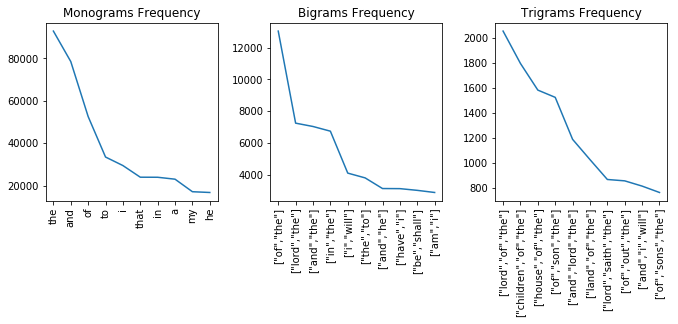

In [79]:
fig = plt.figure(figsize=(10,4)) #set the height and width of the figure

ax1 = fig.add_subplot(131)
ax1.set_title("Monograms Frequency")
plt.plot(monograms[0],monograms[1])
plt.xticks(rotation=90)

ax2 = fig.add_subplot(132)
ax2.set_title("Bigrams Frequency")
plt.plot(bigrams[0],bigrams[1])
plt.xticks(rotation=90)

ax3 = fig.add_subplot(133)
ax3.set_title("Trigrams Frequency")
plt.plot(trigrams[0],trigrams[1])
plt.tight_layout()
plt.xticks(rotation=90)



## For greater than a score of 3 
###  Create a TD - IDF implementation and 
### Analyze the following Sherlock Holmes book from Project Gutenberg text versions of :
The Adventures of Sherlock Holmes-  http://www.gutenberg.org/ebooks/1661.txt.utf-8

A Study in Scarlet - http://www.gutenberg.org/files/244/244-0.txt

The Hound of the Baskervilles - http://www.gutenberg.org/files/2852/2852-0.txt

The Return of Sherlock Holmes - http://www.gutenberg.org/files/108/108-0.txt

The Sign of the Four - http://www.gutenberg.org/ebooks/2097.txt.utf-8

### Display the scores for the top 20 highest frequencty terms and the relationship to the books



#### First we need to remove any punctuations from the files.

Source: http://www.vasanthivuppuluri.com/programming/removing-punctuation-text-file-python/

In [94]:

import string, os
 
def strip_punct(ifile):
    exclude = set(string.punctuation)
 
    f = open(ifile,'r')
    text = f.readlines()
    f.close()
 
    op_file_path = str(ifile)
    if os.path.isfile(op_file_path): # Checks if o/p file exists
        os.remove(op_file_path) # deletes the existing o/p file
 
    for x in xrange(0,len(text)):
        s = text[x]
        s = s.replace('-', ' ')
        s1 = ''.join(ch for ch in s if ch not in exclude)
        op_file = open(op_file_path, 'a')
        op_file.write(s1)
        op_file.close()
    return op_file_path
 

"""Note to self: Remove comments from the following lines one at a time unless you have a really fast machine"""
#strip_punct('data/docs/pg1661.txt')
#strip_punct('data/docs/244-0.txt')
#strip_punct('data/docs/2852-0.txt')
#strip_punct('data/docs/108-0.txt')
#strip_punct('data/docs/pg2097.txt')



'data/docs/244-0.txt'

#### We can now start with our IF-IDF implementation.

Source: 
https://medium.freecodecamp.org/how-to-process-textual-data-using-tf-idf-in-python-cd2bbc0a94a3
https://github.com/mayank408/TFIDFhttps://github.com/mayank408/TFIDF

In [52]:
#Read the documents into strings
doc1 = open('data/docs/pg1661.txt', 'r').read().replace("\n","")
doc2 = open('data/docs/244-0.txt', 'r').read().replace("\n","")
doc3 = open('data/docs/2852-0.txt', 'r').read().replace("\n","")
doc4 = open('data/docs/108-0.txt', 'r').read().replace("\n","")
doc5 = open('data/docs/pg2097.txt', 'r').read().replace("\n","")

In [53]:
#Create lists of words from the strings
bow1 = doc1.split(" ")
bow2 = doc2.split(" ")
bow3 = doc3.split(" ")
bow4 = doc4.split(" ")
bow5 = doc5.split(" ")

In [54]:
#Create a set of words, set have non repititive or unique elements
wordSet = set(bow1).union(set(bow2))
wordSet = wordSet.union(set(bow3))
wordSet = wordSet.union(set(bow4))
wordSet = wordSet.union(set(bow5))

In [55]:
print(len(wordSet))

39725


In [56]:
#Create a dictionary to keep count of occurences of each word. The dicitonaries will contain every word from all 5 documents
wordDict1 = dict.fromkeys(wordSet, 0) 
wordDict2 = dict.fromkeys(wordSet, 0)
wordDict3 = dict.fromkeys(wordSet, 0) 
wordDict4 = dict.fromkeys(wordSet, 0)
wordDict5 = dict.fromkeys(wordSet, 0)

In [57]:
for word in bow1:
    wordDict1[word]+=1 #if the word occurs in the first document, increment frequency

for word in bow2:
    wordDict2[word]+=1

for word in bow3:
    wordDict3[word]+=1
    
for word in bow4:
    wordDict4[word]+=1

for word in bow5:
    wordDict5[word]+=1

In [58]:
import pandas as pd
pd.DataFrame([wordDict1, wordDict2, wordDict3, wordDict4, wordDict5])

,,0txt,0zip,1,10,100,1000,1000pound,1000pounds,108,...,‘never,‘ome,‘revenge’,‘sever,‘ship’s’,‘value’,‘who,‘your’,﻿Project,﻿The
0,645,0,0,1,1,3,6,1,1,0,...,0,0,0,0,0,0,0,0,1,0
1,929,1,1,4,3,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,1
2,2092,1,1,2,1,0,0,0,0,0,...,0,0,0,0,0,1,0,2,1,0
3,807,1,1,3,0,0,0,0,0,2,...,1,0,0,1,0,0,0,0,1,0
4,2110,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [60]:
#Computing TERM FREQUENCY
def computeTF(wordDict, bow):
    tfDict = {}
    bowCount = len(bow)
    for word, count in wordDict.items():
        tfDict[word] = count/float(bowCount)
    return tfDict

In [61]:
tfBow1 = computeTF(wordDict1, bow1)
tfBow2 = computeTF(wordDict2, bow2)
tfBow3 = computeTF(wordDict3, bow3)
tfBow4 = computeTF(wordDict4, bow4)
tfBow5 = computeTF(wordDict5, bow5)

In [62]:
#Computing Inverse Data Frequency
def computeIDF(docList):
    import math
    idfDict = {}
    N = len(docList)
    
    idfDict = dict.fromkeys(docList[0].keys(), 0)
    for doc in docList:
        for word, val in doc.items():
            if val > 0:
                idfDict[word] += 1
    
    for word, val in idfDict.items():
        if val > 0:
            idfDict[word] = math.log10(N / float(val))
        
    return idfDict

In [63]:
idfs = computeIDF([wordDict1, wordDict2, wordDict3, wordDict4, wordDict5])

In [64]:
#Computing TF-IDF
def computeTFIDF(tfBow, idfs):
    tfidf = {}
    for word, val in tfBow.items():
        tfidf[word] = val*idfs[word]
    return tfidf

In [65]:
tfidfBow1 = computeTFIDF(tfBow1, idfs)
tfidfBow2 = computeTFIDF(tfBow2, idfs)
tfidfBow3 = computeTFIDF(tfBow3, idfs)
tfidfBow4 = computeTFIDF(tfBow4, idfs)
tfidfBow5 = computeTFIDF(tfBow5, idfs)

In [66]:
pd.DataFrame([tfidfBow1, tfidfBow2, tfidfBow3, tfidfBow4, tfidfBow5])

,,0txt,0zip,1,10,100,1000,1000pound,1000pounds,108,...,‘never,‘ome,‘revenge’,‘sever,‘ship’s’,‘value’,‘who,‘your’,﻿Project,﻿The
0,0.0,0.000000,0.000000,0.0,0.000002,0.000021,0.000042,0.000007,0.000007,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000002,0.000000
1,0.0,0.000005,0.000005,0.0,0.000015,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000016,0.000016,0.000000,0.000016,0.000000,0.000016,0.000000,0.000000,0.000009
2,0.0,0.000004,0.000004,0.0,0.000004,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000012,0.000000,0.000024,0.000004,0.000000
3,0.0,0.000002,0.000002,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000013,...,0.000006,0.000000,0.000000,0.000006,0.000000,0.000000,0.000000,0.000000,0.000002,0.000000
4,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000009


### IF-IDF Implementation Attempt (Using Mapreduce)

In [88]:
%%capture doc1
%run code/WordCounter.py data/docs/108-0.txt

In [50]:
with open('data/docs/book1.txt','w') as f:
    f.write(doc1.stdout)

In [5]:
book1_words = pd.read_csv('data/docs/book1.txt', sep='\t', header = None)
book1_words.head()

,0,1
0,the,5889
1,i,2840
2,and,2789
3,of,2745
4,to,2561


In [89]:
%%capture doc2
%run code/WordCounter.py data/docs/244-0.txt

In [90]:
with open('data/docs/book2.txt','w') as f:
    f.write(doc2.stdout)

In [8]:
book2_words = pd.read_csv('data/docs/book2.txt', sep='\t', header = None)
book2_words.head()

,0,1
0,the,2510
1,and,1319
2,of,1252
3,to,1094
4,a,997


In [9]:
%%capture doc3
%run code/WordCounter.py data/docs/2852-0.txt

In [10]:
with open('data/docs/book3.txt','w') as f:
    f.write(doc3.stdout)

In [11]:
book3_words = pd.read_csv('data/docs/book3.txt', sep='\t', header = None)
book3_words.head()

,0,1
0,the,3242
1,and,1592
2,of,1592
3,i,1401
4,to,1401


In [12]:
%%capture doc4
%run code/WordCounter.py data/docs/pg1661.txt

In [13]:
with open('data/docs/book4.txt','w') as f:
    f.write(doc4.stdout)

In [14]:
book4_words = pd.read_csv('data/docs/book4.txt', sep='\t', header = None)
book4_words.head()

,0,1
0,the,5211
1,and,2834
2,i,2791
3,to,2606
4,of,2556


In [15]:
%%capture doc5
%run code/WordCounter.py data/docs/pg2097.txt

In [16]:
with open('data/docs/book5.txt','w') as f:
    f.write(doc5.stdout)

In [17]:
book5_words = pd.read_csv('data/docs/book5.txt', sep='\t', header = None)
book5_words.head()

,0,1
0,the,2287
1,of,1162
2,and,1148
3,i,1131
4,to,1105


In [18]:
#Computing TERM FREQUENCY
def computeTF(wordframe):
    tfDict = {}
    wordCount = wordframe[1].sum()
    
    for index, row in wordframe.iterrows():
        tfDict[row[0]] = row[1]/float(wordCount)
    return tfDict

In [19]:
tf1 = computeTF(book1_words)
tf2 = computeTF(book2_words)
tf3 = computeTF(book3_words)
tf4 = computeTF(book4_words)
tf5 = computeTF(book5_words)

In [86]:
wordSet = {}
wordSet = set(book1_words[0]).union(set(book2_words[0]))
wordSet = wordSet.union(set(book3_words[0]))
wordSet = wordSet.union(set(book4_words[0]))
wordSet = wordSet.union(set(book5_words[0]))

In [21]:
#Computing Inverse Data Frequency
def computeIDF(wordSet, books):
    import math
    idfDict = {}
    N = 5 #number of documents
    
    idfDict = dict.fromkeys(wordSet, 0)
    for book in books:
        for index, row in book.iterrows():
            if row[1] > 0:
                idfDict[row[0]] += 1
    
    for word, val in idfDict.items():
        if val > 0:
            idfDict[word] = math.log10(N / float(val))
        
    return idfDict

In [38]:
idf = computeIDF(wordSet, [book1_words, book2_words, book3_words,book4_words, book5_words])
idf

{'raining': 0.3979400086720376,
 'writings': 0.2218487496163564,
 'yellow': 0.0,
 'narcotic': 0.6989700043360189,
 'four': 0.0,
 'prices': 0.3979400086720376,
 'woods': 0.2218487496163564,
 'clotted': 0.3979400086720376,
 'hanging': 0.09691001300805642,
 'conjure': 0.6989700043360189,
 'increase': 0.3979400086720376,
 'granting': 0.3979400086720376,
 'eligible': 0.3979400086720376,
 'sunlit': 0.6989700043360189,
 'originality': 0.6989700043360189,
 'tingle': 0.6989700043360189,
 'firs': 0.6989700043360189,
 'lord': 0.09691001300805642,
 'flicking': 0.6989700043360189,
 'meadows': 0.6989700043360189,
 'shaving': 0.6989700043360189,
 'sinking': 0.09691001300805642,
 'dog\\u2019': 0.6989700043360189,
 'kennels': 0.6989700043360189,
 'epistle': 0.6989700043360189,
 'bile': 0.6989700043360189,
 'uncongenial': 0.6989700043360189,
 'foul': 0.0,
 'pretended': 0.2218487496163564,
 'stabbed': 0.2218487496163564,
 'bringing': 0.0,
 'disturb': 0.3979400086720376,
 'recollections': 0.39794000867203

In [67]:
#Computing TF-IDF
def computeTFIDF(book, idfs):
    tfidf ={}
    for index, row in book.iterrows():
            tfidf[row[0]] = row[1]*idfs[row[0]]
    return tfidf

In [68]:
tfidfBook1 = computeTFIDF(book1_words, idf)
tfidfBook2 = computeTFIDF(book2_words, idf)
tfidfBook3 = computeTFIDF(book3_words, idf)
tfidfBook4 = computeTFIDF(book4_words, idf)
tfidfBook5 = computeTFIDF(book5_words, idf)

In [70]:
tf_idf_data = pd.DataFrame([tfidfBook1, tfidfBook2, tfidfBook3, tfidfBook4, tfidfBook5])

In [74]:
topwords = set(book1_words[:20][0]).union(set(book2_words[:20][0]))
topwords = topwords.union(set(book3_words[:20][0]))
topwords = topwords.union(set(book4_words[:20][0]))
topwords = topwords.union(set(book5_words[:20][0]))
topwords

{'a',
 'and',
 'as',
 'at',
 'for',
 'had',
 'have',
 'he',
 'his',
 'i',
 'in',
 'is',
 'it',
 'my',
 'of',
 'that',
 'the',
 'to',
 'was',
 'we',
 'which',
 'with',
 'you'}

In [82]:
top_tf_idf = tf_idf_data[list(topwords)]
top_tf_idf

,and,is,it,as,at,have,in,for,had,to,...,we,his,that,with,he,a,i,of,the,my
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
